<a href="https://colab.research.google.com/github/hcoh99/AI_study/blob/main/LSTM_UNSW_NB15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras


In [5]:
names = ['srcip','sport','dstip','dsport','proto','state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'Label']
data = pd.read_csv ("/content/UNSW-NB15_1.csv",names = names)
data

<ipython-input-5-142e501c230a>:2: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv ("/content/UNSW-NB15_1.csv",names = names)


,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0.0,3.0,7.0,1.0,3.0,1.0,1.0,1.0,NaN,0.0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0.0,2.0,4.0,2.0,3.0,1.0,1.0,2.0,NaN,0.0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0.0,12.0,8.0,1.0,2.0,2.0,1.0,1.0,NaN,0.0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0.0,6.0,9.0,1.0,1.0,1.0,1.0,1.0,NaN,0.0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0.0,7.0,9.0,1.0,1.0,1.0,1.0,1.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100985,175.45.176.1,1043,149.171.126.18,53,udp,INT,0.000011,114,0,254,...,0.0,10.0,10.0,3.0,6.0,3.0,3.0,3.0,Generic,1.0
100986,175.45.176.2,13442,149.171.126.14,111,tcp,FIN,1.032691,564,354,254,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Reconnaissance,1.0
100987,175.45.176.0,52758,149.171.126.12,3306,tcp,FIN,0.596599,608,646,254,...,0.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,Exploits,1.0
100988,175.45.176.1,19897,149.171.126.15,179,tcp,FIN,0.535891,592,268,254,...,0.0,6.0,5.0,2.0,6.0,2.0,1.0,2.0,Fuzzers,1.0


Text(0.5, 1.0, 'Label')

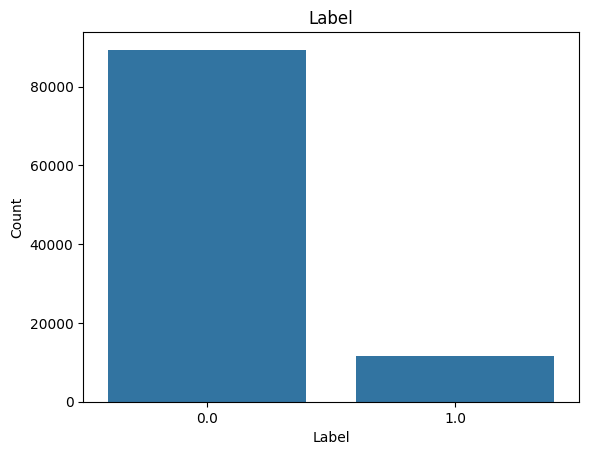

In [6]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = data, x="Label")
plt.ylabel("Count")
plt.title("Label")

In [7]:
# 레이블 갯수 확인 (숫자)
data['Label'].value_counts()

0.0    89400
1.0    11589
Name: Label, dtype: int64

In [9]:
# 결측치 확인
data.isnull().sum()

srcip                   0
sport                   0
dstip                   0
dsport                  0
proto                   0
state                   0
dur                     0
sbytes                  0
dbytes                  0
sttl                    0
dttl                    0
sloss                   0
dloss                   0
service                 0
Sload                   0
Dload                   0
Spkts                   0
Dpkts                   0
swin                    0
dwin                    0
stcpb                   0
dtcpb                   0
smeansz                 0
dmeansz                 0
trans_depth             0
res_bdy_len             1
Sjit                    1
Djit                    1
Stime                   1
Ltime                   1
Sintpkt                 1
Dintpkt                 1
tcprtt                  1
synack                  1
ackdat                  1
is_sm_ips_ports         1
ct_state_ttl            1
ct_flw_http_mthd        1
is_ftp_login

In [10]:
data = data.drop('attack_cat' , axis=1)

In [11]:
# 결측치 제거
data = data.dropna()
data.isnull().sum()

srcip               0
sport               0
dstip               0
dsport              0
proto               0
state               0
dur                 0
sbytes              0
dbytes              0
sttl                0
dttl                0
sloss               0
dloss               0
service             0
Sload               0
Dload               0
Spkts               0
Dpkts               0
swin                0
dwin                0
stcpb               0
dtcpb               0
smeansz             0
dmeansz             0
trans_depth         0
res_bdy_len         0
Sjit                0
Djit                0
Stime               0
Ltime               0
Sintpkt             0
Dintpkt             0
tcprtt              0
synack              0
ackdat              0
is_sm_ips_ports     0
ct_state_ttl        0
ct_flw_http_mthd    0
is_ftp_login        0
ct_ftp_cmd          0
ct_srv_src          0
ct_srv_dst          0
ct_dst_ltm          0
ct_src_ltm          0
ct_src_dport_ltm    0
ct_dst_spo

In [12]:
data


,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0.0,0.0,3.0,7.0,1.0,3.0,1.0,1.0,1.0,0.0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0.0,0.0,2.0,4.0,2.0,3.0,1.0,1.0,2.0,0.0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0.0,0.0,12.0,8.0,1.0,2.0,2.0,1.0,1.0,0.0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0.0,0.0,6.0,9.0,1.0,1.0,1.0,1.0,1.0,0.0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0.0,0.0,7.0,9.0,1.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100984,175.45.176.1,1043,149.171.126.18,53,udp,INT,0.000011,114,0,254,...,0.0,0.0,10.0,10.0,3.0,6.0,3.0,3.0,3.0,1.0
100985,175.45.176.1,1043,149.171.126.18,53,udp,INT,0.000011,114,0,254,...,0.0,0.0,10.0,10.0,3.0,6.0,3.0,3.0,3.0,1.0
100986,175.45.176.2,13442,149.171.126.14,111,tcp,FIN,1.032691,564,354,254,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
100987,175.45.176.0,52758,149.171.126.12,3306,tcp,FIN,0.596599,608,646,254,...,0.0,0.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0


<ipython-input-13-6bf798923233>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax = ax)


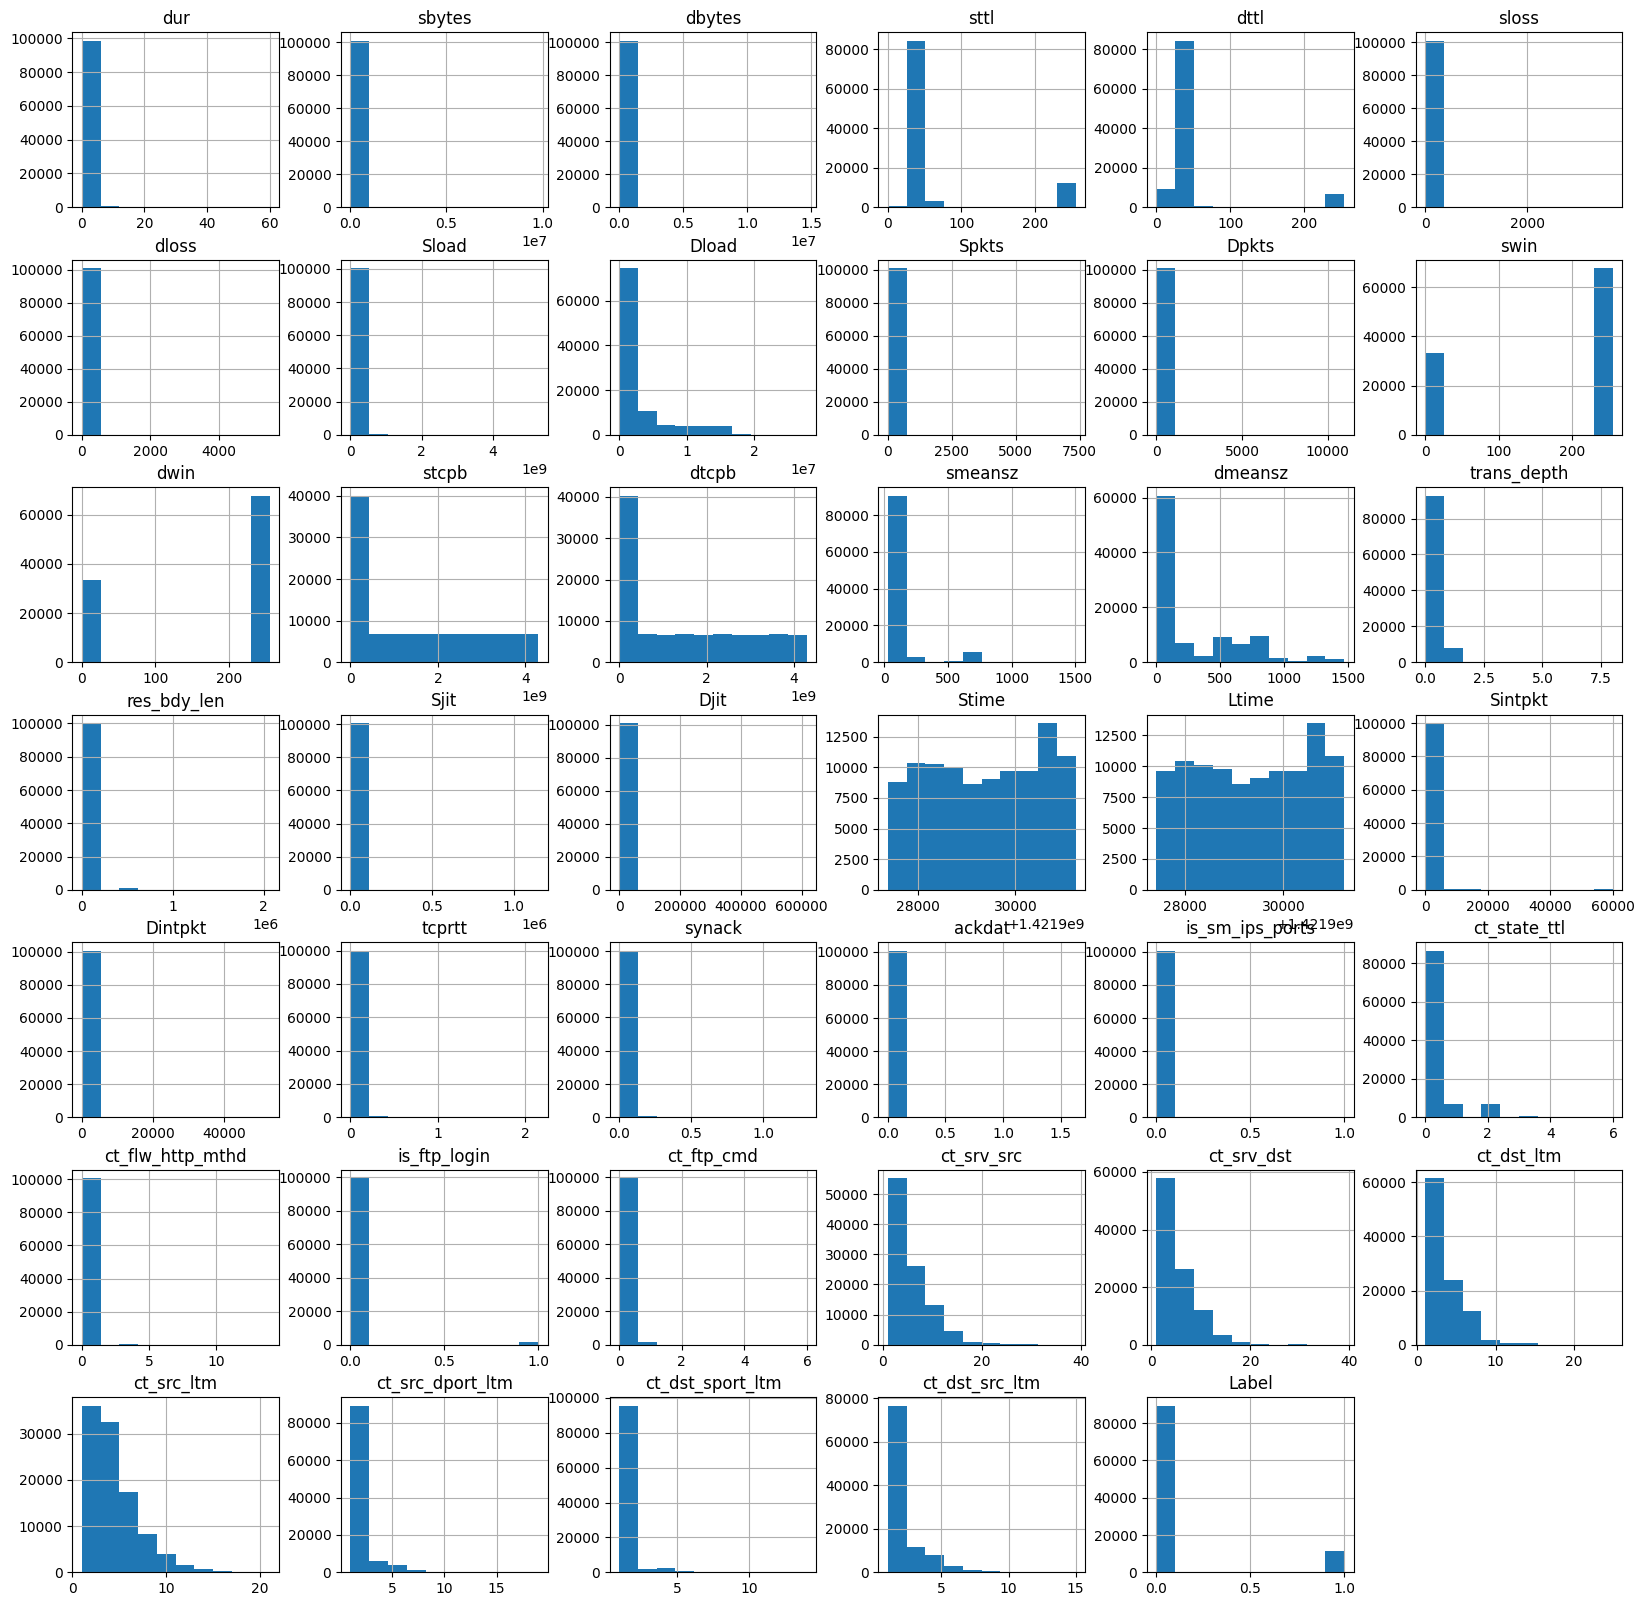

In [13]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (20,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

In [14]:
 df_shuffled = data.sample(frac=1)

# 절반만 선택

data = df_shuffled.iloc[:len(df_shuffled)//2]

In [15]:
import numpy as np

# IP 주소를 정수로 변환하는 함수
def ip_to_int(ip):
    parts = np.array(ip.split('.')).astype(int)
    return np.sum(parts * np.array([256**i for i in range(3, -1, -1)]))


In [16]:
for i in data['srcip']:
  data['srcip'] = ip_to_int(i)

<ipython-input-16-05db495c1eb4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['srcip'] = ip_to_int(i)


In [17]:
data = data.drop('dsport' , axis=1)
data = data.drop('sport' , axis=1)

In [18]:
label_encode = LabelEncoder()
data['proto'] = label_encode.fit_transform(data['proto'].values.ravel())
data['dstip'] = label_encode.fit_transform(data['dstip'].values.ravel())
data['state'] = label_encode.fit_transform(data['state'].values.ravel())
data['service']= label_encode.fit_transform(data['service'].values.ravel())
data

,srcip,dstip,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
73914,1000734723,22,114,4,0.027201,1064,2364,31,29,4,...,0.0,0.0,9.0,6.0,2.0,3.0,1.0,1.0,1.0,0.0
40705,1000734723,4,114,4,0.007936,2230,13500,31,29,7,...,0.0,0.0,8.0,7.0,3.0,5.0,1.0,1.0,2.0,0.0
76594,1000734723,4,114,4,1.628681,2934,3742,31,29,11,...,1.0,1.0,1.0,1.0,4.0,2.0,1.0,1.0,2.0,0.0
57015,1000734723,22,114,4,0.023932,2542,23508,31,29,7,...,0.0,0.0,4.0,9.0,5.0,4.0,1.0,1.0,4.0,0.0
89224,1000734723,16,120,2,0.004458,568,312,31,29,0,...,0.0,0.0,5.0,6.0,2.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,1000734723,4,114,4,24.954138,1052,824,31,29,2,...,0.0,0.0,4.0,8.0,16.0,3.0,3.0,1.0,1.0,0.0
73177,1000734723,17,114,4,0.028934,37232,3380,31,29,18,...,0.0,0.0,1.0,2.0,2.0,4.0,1.0,1.0,1.0,0.0
50580,1000734723,22,114,4,1.026460,1684,10168,31,29,3,...,0.0,0.0,2.0,3.0,1.0,2.0,2.0,1.0,1.0,0.0
9829,1000734723,5,114,4,0.006490,3728,5474,31,29,7,...,0.0,0.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,0.0


In [19]:
y=data['Label']
y.value_counts()

0.0    44745
1.0     5749
Name: Label, dtype: int64

In [20]:
X=data.drop('Label',axis=1)
X.head()

,srcip,dstip,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
73914,1000734723,22,114,4,0.027201,1064,2364,31,29,4,...,0.0,0.0,0.0,9.0,6.0,2.0,3.0,1.0,1.0,1.0
40705,1000734723,4,114,4,0.007936,2230,13500,31,29,7,...,0.0,0.0,0.0,8.0,7.0,3.0,5.0,1.0,1.0,2.0
76594,1000734723,4,114,4,1.628681,2934,3742,31,29,11,...,0.0,1.0,1.0,1.0,1.0,4.0,2.0,1.0,1.0,2.0
57015,1000734723,22,114,4,0.023932,2542,23508,31,29,7,...,0.0,0.0,0.0,4.0,9.0,5.0,4.0,1.0,1.0,4.0
89224,1000734723,16,120,2,0.004458,568,312,31,29,0,...,0.0,0.0,0.0,5.0,6.0,2.0,1.0,1.0,1.0,1.0


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.1,
                                                    shuffle = True,
                                                    random_state = 21)

In [22]:

def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [23]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train, y_train = split_sequences(train_set, 50)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 50)
print(X_test.shape, y_test.shape)

(45395, 50, 45) (45395,)
(5001, 50, 45) (5001,)


In [24]:

y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

In [25]:
X_train = X_train.astype('float32')
y_train_onehot = y_train_onehot.astype('float32')
X_test = X_test.astype('float32')
y_test_onehot = y_test_onehot.astype('float32')

In [47]:

# Produce variables for CNN input/output shape
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_onehot.shape[1]
print(n_timesteps, n_features, n_outputs)

50 45 2


In [48]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RNN

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RNN, LSTMCell, Dropout

model = Sequential()
model.add(LSTM(units = 128, input_shape = [n_timesteps, n_features], activation = 'relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(units = 128, activation = "relu"))
model.add(Dense(n_outputs, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               89088     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 105858 (413.51 KB)
Trainable params: 105858 (413.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
validation_split = 0.1
history = model.fit(X_train, y_train_onehot, batch_size= 192, epochs=10, verbose=True,  validation_split=validation_split)

Epoch 1/10
213/213 [==============================] - 15s 59ms/step - loss: 68621632.0000 - accuracy: 0.8053 - val_loss: 4309386.5000 - val_accuracy: 0.8227
Epoch 2/10
213/213 [==============================] - 12s 56ms/step - loss: 3457098.2500 - accuracy: 0.8067 - val_loss: 1577019.7500 - val_accuracy: 0.8407
Epoch 3/10
213/213 [==============================] - 12s 56ms/step - loss: 1168767.8750 - accuracy: 0.8077 - val_loss: 685817.5000 - val_accuracy: 0.7123
Epoch 4/10
213/213 [==============================] - 12s 57ms/step - loss: 773131.3750 - accuracy: 0.8036 - val_loss: 881982.3125 - val_accuracy: 0.8672
Epoch 5/10
213/213 [==============================] - 11s 52ms/step - loss: 530129.6250 - accuracy: 0.8165 - val_loss: 340589.7500 - val_accuracy: 0.8537
Epoch 6/10
213/213 [==============================] - 12s 55ms/step - loss: 613209.1250 - accuracy: 0.8178 - val_loss: 462225.7500 - val_accuracy: 0.8491
Epoch 7/10
213/213 [==============================] - 12s 57ms/step - 

In [32]:
y_pred = model.predict(X_test)

157/157 [==============================] - 2s 15ms/step


In [53]:
mse = tf.reduce_mean(tf.square(X_test ,y_test))

print(f'MSE: {mse.numpy()}')

MSE: 2.977372347218002e+17


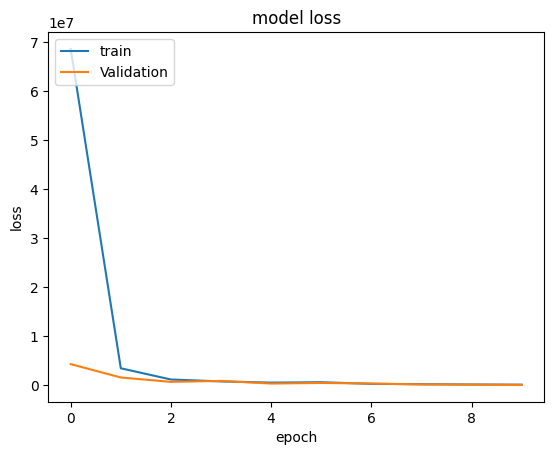

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

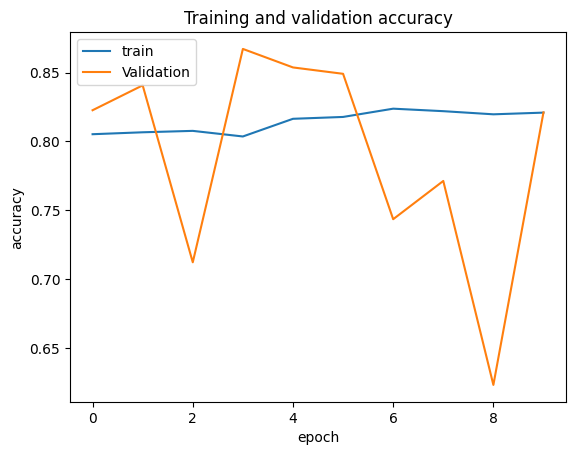

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')